This notebook contains:

- Tested code of Dadu et al clustering algorithm.
- All code for their result analysis section

In [1]:
from pathlib import Path
import sys
import os
PPMI_CLINICAL_GEN_DATA_DIR_INSIDE = Path('D:/data/raw/ppmi/behavior')
# sys.path.append(str(Path(os.getcwd()).parent))
dataset_name = '01_22_2024'
from pathlib import Path
import pandas as pd
from sklearn import mixture
import os
import numpy as np
import pandas as pd
from collections import defaultdict
from datetime import datetime
import pickle
import copy
import warnings
warnings.filterwarnings("ignore")

import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

PPMI_CLINICAL_GEN_DATA_DIR_INSIDE = PPMI_CLINICAL_GEN_DATA_DIR_INSIDE / 'dadu_etal_generated_data/clinical/ppmi'

with open(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE / 'preprocessed/{}.pkl'.format(dataset_name), 'rb') as f:
    preprocessed_data = pickle.load(f)
    
with open(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE / 'representation_learning/{}.pkl'.format(dataset_name), 'rb') as f:
    representation_learning_data = pickle.load(f)
    
with open(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE / 'clustering/{}.pkl'.format(dataset_name), 'rb') as f:
    clustering_data = pickle.load(f)

# input_data contains all combined data from preprocessed, representation learning and clustering
input_data = {}
input_data.update(preprocessed_data)
input_data.update(representation_learning_data)
input_data.update(clustering_data)
datasets = input_data['data_names']

In [3]:
dset_name = 'paper_experiment_flip_outlier'
input_data['M_chosen'][dset_name]
dataframe = pd.DataFrame(input_data['M_chosen'][dset_name])

In [4]:
bl_v04_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col]
bl_v04_v06_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col]
bl_v04_v06_v08_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col]
bl_v04_v06_v08_v10_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col  or 'V10' in col]
bl_v04_v06_v08_v10_v12_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col  or 'V10' in col or 'V12' in col]

bl_v04_dataframe = dataframe[bl_v04_columns]
bl_v04_v06_dataframe = dataframe[bl_v04_v06_columns]
bl_v04_v06_v08_dataframe = dataframe[bl_v04_v06_v08_columns]
bl_v04_v06_v08_v10_dataframe = dataframe[bl_v04_v06_v08_v10_columns]
bl_v04_v06_v08_v10_v12_dataframe = dataframe[bl_v04_v06_v08_v10_v12_columns]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [26]:
def clustering_vertical_datasets(train_dataset, train_dataset_name, test_dataset, test_dataset_name):
    pca = PCA(n_components=3)
    train_dataset_pca = pca.fit_transform(train_dataset)
    train_dataset_gmm_pca = GaussianMixture(n_components=3, random_state=0).fit(train_dataset_pca)

    fig, ax = plt.subplots()
    
    # for X, dataset_name, ax in zip(all_dataframes, dataset_names):
    train_dataset_pca = pca.transform(train_dataset)
    train_dataset_labels = train_dataset_gmm_pca.predict(train_dataset_pca)

    plot_clusters(ax, train_dataset_pca, train_dataset_labels, train_dataset_name, "GMM + PCA")
    
    
    fig, ax2 = plt.subplots()

    test_dataset_pca = pca.fit_transform(test_dataset)
    train_datset_labels = train_dataset_gmm_pca.predict(test_dataset_pca)

    plot_clusters(ax2, test_dataset_pca, train_datset_labels, test_dataset_name, "GMM + PCA")

In [22]:
def plot_clusters(ax, X, labels, dataset_name, model_name):
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    for i, (label, color) in enumerate(zip(unique_labels, colors)):
        ax.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=f'Cluster {label}')
    ax.set_title(f'{model_name} clustering - Model: {dataset_name}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

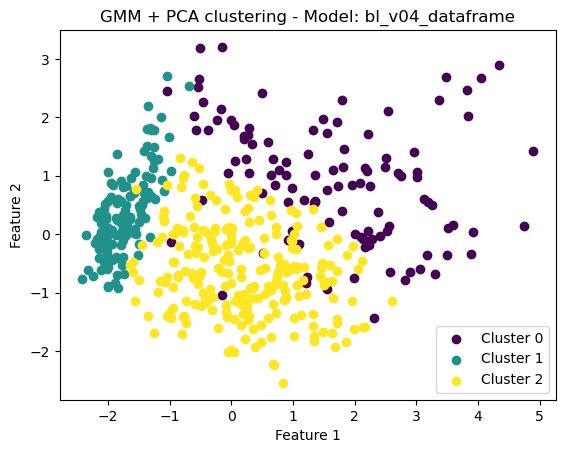

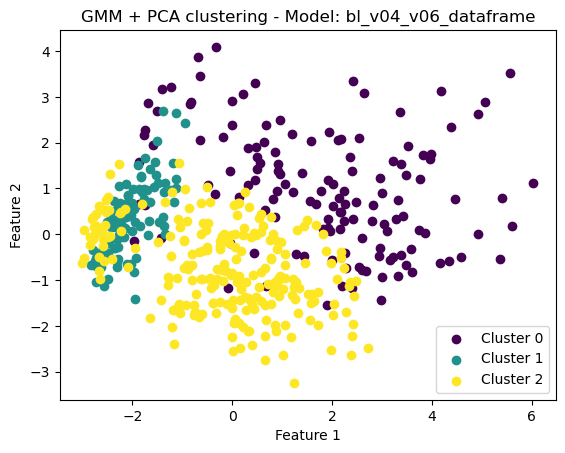

In [27]:
clustering_vertical_datasets(bl_v04_dataframe, 'bl_v04_dataframe', bl_v04_v06_dataframe, 'bl_v04_v06_dataframe')

In [ ]:
clustering_vertical_datasets(bl_v04_dataframe, 'bl_v04_dataframe', bl_v04_v06_dataframe, 'bl_v04_v06_v08_dataframe')
clustering_vertical_datasets(bl_v04_dataframe, 'bl_v04_dataframe', bl_v04_v06_dataframe, 'bl_v04_v06_v08_v10_dataframe')
clustering_vertical_datasets(bl_v04_dataframe, 'bl_v04_dataframe', bl_v04_v06_dataframe, 'bl_v04_v06_v08_v10_v12_dataframe')

bl_v04_v06_v08_v10_dataframe
bl_v04_v06_v08_v10_v12_dataframe

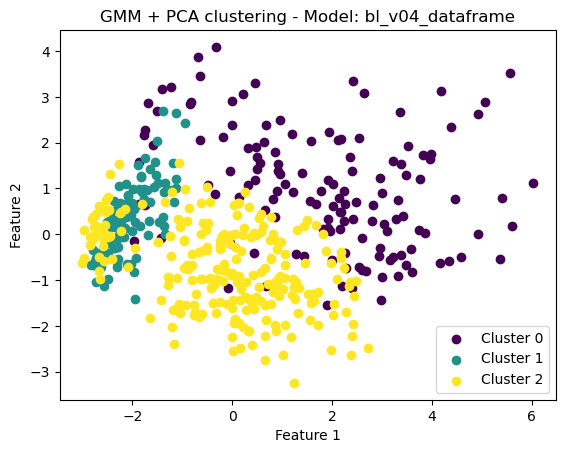

In [13]:
fig, axs = plt.subplots()

Y = bl_v04_v06_dataframe
X_bl_v04_v06_pca = pca.fit_transform(Y)
bl_v04_v06_labels = gmm_pca.predict(X_bl_v04_v06_pca)

plot_clusters(axs, X_bl_v04_v06_pca, bl_v04_v06_labels, dataset_name, "GMM + PCA")

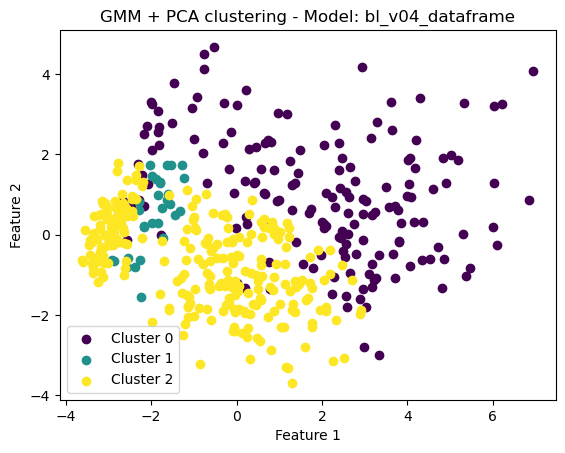

In [14]:
fig, ax2 = plt.subplots()

Z = bl_v04_v06_v08_dataframe
X_bl_v04_v06_v08_pca = pca.fit_transform(Z)
bl_v04_v06_v08_labels = gmm_pca.predict(X_bl_v04_v06_v08_pca)

plot_clusters(ax2, X_bl_v04_v06_v08_pca, bl_v04_v06_v08_labels, dataset_name, "GMM + PCA")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Define a function to plot clusters
def plot_clusters(ax, X, labels, dataset_name, model_name):
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    for i, (label, color) in enumerate(zip(unique_labels, colors)):
        ax.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=f'Cluster {label}')
    ax.set_title(f'{model_name} clustering - Model: {dataset_name}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

In [17]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from dotmap import DotMap
import pandas as pd
from sklearn import mixture

In [3]:
input_data['nmf3_projection_cluster']['paper_experiment_replication_BL'][1].var()

Sleep dimension        0.007960
Motor dimension        0.012281
Cognitive dimension    0.002115
dtype: float64

In [4]:
preprocessed_copy = copy.deepcopy(preprocessed_data)

In [47]:
preprocessed_copy['Labels']['paper_experiment_flip_outlier']

,ENROLL_CAT,APPRDX,CURRENT_APPRDX,BIRTHDT,GENDER,HISPLAT,RAINDALS,RAASIAN,RABLACK,RAHAWOPI,RAWHITE,RANOS,ORIG_ENTRY
PATNO,,,,,,,,,,,,,
50275,GENUN,6.0,6.0,1959-01-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2014-05-01
12224,PRODROMA,4.0,4.0,1947-01-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2013-10-01
12593,PRODROMA,4.0,4.0,1947-01-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2013-11-01
14281,PRODROMA,4.0,4.0,1951-01-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2013-11-01
3000,HC,2.0,2.0,1941-01-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60059,PRODROMA,4.0,4.0,1943-01-01,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2014-02-01
60060,PRODROMA,4.0,4.0,1948-01-01,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2014-02-01
60063,PRODROMA,4.0,4.0,1943-01-01,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2014-02-01


In [18]:
perform_dimensionality_reduction

Creating Progression space for _BL:  ['BL']
Creating Progression space for _V04:  ['BL', 'V04']
Creating Progression space for _V06:  ['BL', 'V04', 'V06']
Creating Progression space for _V08:  ['BL', 'V04', 'V06', 'V08']
Creating Progression space for _V10:  ['BL', 'V04', 'V06', 'V08', 'V10']
Creating Progression space for :  ['BL', 'V04', 'V06', 'V08', 'V10', 'V12']
Creating Progression space for _BL:  ['BL']
Creating Progression space for _V04:  ['BL', 'V04']
Creating Progression space for _V06:  ['BL', 'V04', 'V06']
Creating Progression space for :  ['BL', 'V04', 'V06', 'V08']


In [19]:
re_clustering_data = perform_clustering(preprocessed_copy)

trained model is non
trained model is non
trained model is non
trained model is non
trained model is non
trained model is non
trained model is non
trained model is non


In [20]:
preprocessed_copy.update(re_clustering_data)

In [21]:
preprocessed_copy['nmf3_projection_cluster']['paper_experiment_replication_BL'][1].var()

Sleep dimension        0.007960
Motor dimension        0.012281
Cognitive dimension    0.002115
dtype: float64

The input_data variable is loaded from the result provided by the Authors Dadu et al.

I have copied and modified their clustering algorithm in certain places.

Here recalculated the clustering and finally printing the Sleep, Motor, 
Cognitive dimensions values to check if they are sames as the input_data 
provided by the authors.

It is done to verify that the copying is bugfree.

Also, now I'm certain that the clustering algorithm is ready to be used.

In [25]:
dset = 'paper_experiment_flip_outlier'

In [26]:
main_cluster_labels = get_labels(preprocessed_copy)

In [27]:
main_cluster_labels

,GMM_2d,GMM_2d_adj,GMM_3d,GMM_3d_adj,cat,GMM
PATNO,,,,,,
3000,HC,HC,HC,HC,control,HC
3001,PD_m,PD_m,PD_l,PD_m,case,PD_m
3002,PD_h,PD_h,PD_h,PD_h,case,PD_h
3003,PD_h,PD_m,PD_l,PD_m,case,PD_m
3004,HC,HC,HC,HC,control,HC
...,...,...,...,...,...,...
4115,PD_l,PD_m,PD_l,PD_m,case,PD_m
4116,HC,HC,HC,HC,control,HC
4117,PD_m,PD_m,PD_l,PD_l,case,PD_m


In [30]:
Labels_save = main_cluster_labels[['GMM']].reset_index().copy()
Labels_save.columns = ['PATNO', 'Subtypes']

In [31]:
Labels_save['Subtypes'].value_counts()

HC      154
PD_l    136
PD_m    114
PD_h     44
Name: Subtypes, dtype: int64

In [35]:
visits_list = ['BL', 'V04', 'V06', 'V08', 'V10', 'V12']
dims = 2
df = pd.DataFrame(preprocessed_copy['nmf_model']['{}'.format(dset)].components_)
cols = preprocessed_copy['M_chosen'][dset].columns
df.columns = cols
LW = []
for i in visits_list:
    temp = df.loc[:, df.columns.get_level_values(-1)==i]
    temp.columns = temp.columns.get_level_values(0)
    LW.append(temp)

P_2d = pd.concat([i.round(2) for i in LW], axis=0)
K = []
for i in visits_list:
    K.extend(['C{}-'.format(j)+i for  j in range(int(dims))])
P_2d.index = K
P_2d = P_2d.sort_index()

In [36]:
P_2d.head(2)

,CN2RSP,CN346RSP,CN8RSP,NP1ANXS,NP1APAT,NP1COG,NP1DDS,NP1DPRS,NP1HALL,NP1CNST,...,pupillomotor,skin,thermoregulatory,urinary,VLTANIM,VLTFRUIT,VLTVEG,a_state,a_trait,SDMTOTAL
C0-BL,0.06,0.04,0.05,0.24,0.14,0.13,0.02,0.16,0.05,0.25,...,0.12,0.16,0.08,0.32,0.35,0.33,0.33,0.33,0.28,0.36
C0-V04,0.04,0.05,0.03,0.24,0.23,0.17,0.04,0.22,0.09,0.35,...,0.18,0.24,0.14,0.34,0.33,0.36,0.33,0.31,0.31,0.38


In [40]:
subtype_replace = {'PD_h':'PDvec3', 'PD_m': 'PDvec2', 'PD_l':'PDvec1', 'HC':'Non-PD', 'Control': 'Non-PD'}
progression_space_2d_adj_list = []
progression_space_2d_transform_list = []
progression_space_2d_actual_list = []
for visit in visits_list:
    if visit== 'V12':
        visit = ''
    else:
        visit = '_' + visit
    temp = preprocessed_copy['nmf_projection_cluster']['{}{}'.format(dset, visit)][1]
    temp['Subtypes'] = main_cluster_labels.loc[list(set(temp.index).intersection(main_cluster_labels.index)), 'GMM']
    progression_space_2d_adj_list.append(temp.dropna().replace(subtype_replace))

In [41]:
df = progression_space_2d_adj_list[0][['Subtypes', 'Motor dimension', 'Cognitive dimension']].copy()
df.columns = ['Subtypes', 'Motor_dimension_BL', 'Cognitive_dimension_BL']

for i in range(1, len(progression_space_2d_adj_list)):
    temp = progression_space_2d_adj_list[i][['Motor dimension', 'Cognitive dimension']].copy()
    temp.columns = [  'Motor_dimension_{}'.format(visits_list[i]), 
                    'Cognitive_dimension_{}'.format(visits_list[i])]
    df = pd.merge(df,temp, left_index=True, right_index=True)

In [42]:


def create_plot_cluster(M_PD_HC_gmm_chosen, xlab, ylab, legends=('PDvec3', 'PDvec2', 'PDvec1', 'Non-PD')):

    x_hc = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['Non-PD']), xlab]
    y_hc = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['Non-PD']), ylab]

    x_pd_l = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['PDvec1']), xlab]
    y_pd_l = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['PDvec1']), ylab]

    x_pd_m = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['PDvec2']), xlab]
    y_pd_m = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['PDvec2']), ylab]

    x_pd_h = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['PDvec3']), xlab]
    y_pd_h = M_PD_HC_gmm_chosen.loc[M_PD_HC_gmm_chosen.Subtypes.isin(['PDvec3']), ylab]

    plt.ion()
    plt.show()
    plt.pause(0.001)
    a = 0.1
    l = 10
    zo = 0
    columns = 1
    rows = 1
    size_variation = 1.5
    # fig, axislist = plt.subplots(rows, columns, figsize=(4*columns*size_variation, 3*rows*size_variation))
    p = sns.JointGrid(x=x_hc, y=y_hc)
    # sns.despine(top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    p = p.plot_joint(plt.scatter, c="r", alpha=a)
    # p.ax_marg_x.hist(-x_hc, alpha = 0.5, color='r')
    # p.ax_marg_y.hist(y_hc, orientation = 'horizontal', alpha = 0.5, color='r')
    p.plot_marginals(sns.distplot, color='r', axlabel=[])
    p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")

    p.x = x_pd_l
    p.y = y_pd_l
    p.plot_joint(plt.scatter, c="g", alpha=a)
    p.plot_marginals(sns.distplot, color='g', axlabel=[])
    p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Greens")

    p.x = x_pd_m
    p.y = y_pd_m
    p.plot_joint(plt.scatter, c="b", alpha=a)
    p.plot_marginals(sns.distplot, color='b', axlabel=[])
    p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Blues")

    p.x = x_pd_h
    p.y = y_pd_h
    p.plot_joint(plt.scatter, c="orange", alpha=a)
    p.plot_marginals(sns.distplot, color='orange', axlabel=[])
    p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Oranges")

    # p.set_axis_labels(xlabel='Cognitive/Sleep disturbance', ylabel='Motor disturbance')
    plt.xlabel(r'{}$\rightarrow$'.format(xlab))
    plt.ylabel(r'{}$\rightarrow$'.format(ylab))
    limit_x = 1.
    limit_y = 1.2
    p.ax_joint.set_ylim(0, limit_y)
    p.ax_joint.set_xlim(0, limit_x)
    p.ax_joint.set_xticks(list(np.arange(0, limit_x+0.05, 0.2)), None)
    p.ax_joint.set_yticks(list(np.arange(0, limit_y+0.05, 0.2)), None)
    p.ax_joint.grid(True, alpha=0.3)
    p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='orange')
    p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
    p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
    p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
    plt.legend((p1, p2, p3, p4), legends, loc='best', prop={'size': 12});
    # sns.despine(ax=p.ax_joint,top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    p.ax_joint.spines['top'].set_visible(False)
    p.ax_joint.spines['right'].set_visible(False)
    p.ax_joint.spines['left'].set_visible(False)
    p.ax_joint.spines['bottom'].set_visible(False)



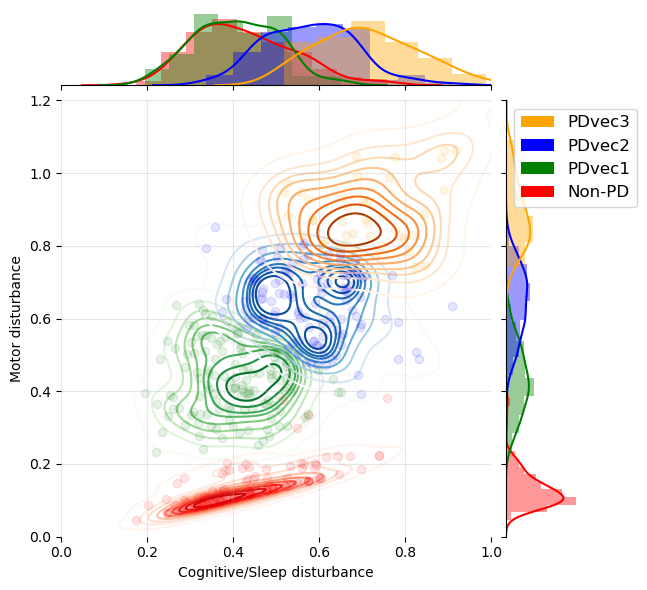

In [43]:

dimension_name2 = {'Motor dimension': 'Motor disturbance', 'Cognitive dimension': 'Cognitive/Sleep disturbance'}
create_plot_cluster(progression_space_2d_adj_list[-1].rename(columns=dimension_name2), dimension_name2['Cognitive dimension'],  dimension_name2['Motor dimension'])
# plt.savefig('images/Fig5_2D_gmm', dpi=100, bbox_inches = "tight")

In [13]:
def perform_dimensionality_reduction(input_data):
    data_names = input_data["data_names"]
    M_chosen = input_data["M_chosen"]
    data_parameters_list = input_data["data_parameters_list"]
    Labels = input_data["Labels"]
    return_data = {}
    dr_weights = {}
    nmf_model = {}
    nmf_dr_weights = {}
    nmf3_dr_weights = {}
    nmf3_model = {}
    nmf4_dr_weights={}
    nmf4_model={}
    cluster_final_visit_3d = {}
    cluster_final_visit_2d = {}
    for e, data_parameters in enumerate(data_parameters_list):
        for e2, last_visit in enumerate(data_parameters.last_visits):
            if e2 == (len(data_parameters.last_visits) - 1):
                st_add = ''
            else:
                st_add = '_' + last_visit
            visit_in_consider = [visit for  e_v, visit in enumerate(data_parameters.visits_list) if e_v <= data_parameters.visits_list.index(last_visit)]
            print ('Creating Progression space for {}: '.format(st_add), visit_in_consider)
            temp_M_chosen = M_chosen[data_names[e]].loc[:, M_chosen[data_names[e]].columns.get_level_values(1).isin(visit_in_consider)]
            dr_weights[data_names[e]+st_add], nmf_model[data_names[e]+st_add] = apply_dimensionality_reduction(temp_M_chosen, how={'NMF': 2})
            temp_2d = dr_weights[data_names[e] + st_add].copy()
            nmf_dr_weights[data_names[e]+st_add] = temp_2d[temp_2d['model_name']=='NMF']
            nmf3_dr_weights[data_names[e]+st_add], nmf3_model[data_names[e]+st_add] = apply_dimensionality_reduction(temp_M_chosen, how={'NMF': 3})
            for dim_replication in [4,6,8,10,20]:
                nmf4_dr_weights[data_names[e]+st_add+'_'+str(dim_replication)], nmf4_model[data_names[e]+st_add+'_'+str(dim_replication)] = apply_dimensionality_reduction(temp_M_chosen, how={'NMF': dim_replication})
            d_how = [{'PCA': 2}, {'ICA': 2}]
            for i in d_how:
                temp, model = apply_dimensionality_reduction(temp_M_chosen, how=i)
                dr_weights[data_names[e]+st_add] = pd.concat([dr_weights[data_names[e]+st_add], temp], axis=0)
            dr_weights[data_names[e]+st_add]['ENROLL_CAT'] = pd.merge(temp_M_chosen, Labels[data_names[e]][['ENROLL_CAT']], left_index=True, right_index=True)['ENROLL_CAT']
            df = pd.DataFrame(nmf3_model[data_names[e] + st_add].components_, columns=temp_M_chosen.columns)
            cluster_final_visit_3d[data_names[e]+st_add] = get_cluster_projection_matrix(nmf3_dr_weights[data_names[e]+st_add], df, last_visit, dataset=data_parameters.dataset)
            df = pd.DataFrame(nmf_model[data_names[e] + st_add].components_, columns=temp_M_chosen.columns)
            cluster_final_visit_2d[data_names[e] + st_add] = get_cluster_projection_matrix(nmf_dr_weights[data_names[e]+st_add], df, last_visit, num_cluster=2, dataset=data_parameters.dataset)
    return_data['dr_weights'] = dr_weights
    return_data['nmf_dr_weights'] = nmf_dr_weights
    return_data['nmf_model'] = nmf_model
    return_data['nmf_projection_cluster'] = cluster_final_visit_2d
    return_data['nmf3_dr_weights'] = nmf3_dr_weights
    return_data['nmf3_model'] = nmf3_model
    return_data['nmf3_projection_cluster'] = cluster_final_visit_3d
    return_data['nmf4_dr_weights'] = nmf4_dr_weights
    return_data['nmf4_model'] = nmf4_model
    return return_data

In [12]:
def apply_dimensionality_reduction_te(X, method = 'NMF', n_dim = 2):
    if method == 'NMF':
        model = NMF(n_components=n_dim, init='nndsvd', random_state=42)
    elif method == 'PCA':
        model = PCA(n_components=n_dim, random_state=42)
    elif method == 'ICA':
        model = FastICA(n_components=n_dim, random_state=42)
    # elif method == 'UMAP':
    #     model = umap.UMAP(n_components=n_dim)
    W = model.fit_transform(X)
    return model, W

In [11]:
def apply_dimensionality_reduction(X, how={'NMF': 2}):
    method = list(how)[0]
    n_dim = how[method]
    if method == 'NMF':
        # model =  NMF(n_components=n_dim, init='random', random_state=42, alpha=1, l1_ratio=1)
        model =  NMF(n_components=n_dim, init='nndsvd', random_state=42)
    elif method == 'PCA':
        model = PCA(n_components=n_dim, random_state=42)
    elif method == 'ICA':
        model = FastICA(n_components=n_dim, random_state=42)
    W = model.fit_transform(X.values)
    W = pd.DataFrame(W, index=X.index, columns=['latent_weight{}'.format(i) for i in range(1, n_dim+1)])
    W['model_name'] = [method] * len(W)
    return W, model

from sklearn.decomposition import NMF, PCA, FastICA

In [10]:
def get_cluster_projection_matrix(weights, components, visit_id, num_cluster=3, dataset='ppmi'):
    # import pdb; pdb.set_trace()
    weights = weights[['latent_weight{}'.format(i) for i in range(1, components.shape[0]+1)]]
    t_bcomponents = components.iloc[:, components.columns.get_level_values(1) == visit_id]
    t_bcomponents.columns = [i for i, j in t_bcomponents.columns]
    x = t_bcomponents.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    t_bcomponents = pd.DataFrame(x_scaled, columns=t_bcomponents.columns)
    X_Norm = t_bcomponents.values.transpose()  # preprocessing.normalize(bcomponents[data_names[e]])
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(X_Norm)
    clustered_feats = []
    transposed = t_bcomponents.T
    for i in range(num_cluster):
        clustered_feats.append(list(set(transposed[kmeans.labels_ == i].index.values.tolist())))
    if len(clustered_feats) == 3:
        cluster_kmeans = {'Sleep': clustered_feats[0], 'Motor': clustered_feats[1], 'Cognitive': clustered_feats[2]}
        # if dataset == 'ppmi':
        #    cluster_kmeans = {'Sleep': clustered_feats[1], 'Motor': clustered_feats[0], 'Cognitive': clustered_feats[2]}
    else:
        cluster_kmeans = {'Cognitive': clustered_feats[0], 'Motor': clustered_feats[1]}
    cluster_kmeans = get_correct_order(cluster_kmeans, dataset=dataset)
    # if len(weights) == 476 and len(clustered_feats) == 3:
    #    temp = copy.copy(cluster_kmeans['Sleep'])
    #    cluster_kmeans['Sleep'] = copy.copy(cluster_kmeans['Motor'])
    #    cluster_kmeans['Motor'] = copy.copy(temp)

    # import pdb; pdb.set_trace()
    component_belong = {}
    df = {}
    for dim, dim_list in cluster_kmeans.items():
        x = components[dim_list].mean(axis=1)
        x = x.reset_index()
        x['index'] = x['index'].map(lambda x: str(x))
        x['component']= x['index'].map(lambda x: int(x))
        # adjust_weights_v12 = x[x['index'].str.contains('V12')].groupby('component').mean()
        adjust_weights = x.groupby('component').mean()
        adjust_weights = adjust_weights / adjust_weights.sum()
        # import pdb; pdb.set_trace()
        y = np.array(adjust_weights).reshape(-1) * np.array(weights)
        y = y.sum(axis=1)
        df['{} dimension'.format(dim)] = list(y)
        # import pdb; pdb.set_trace()
        component_belong['latent_weight{}'.format(1+int(adjust_weights.idxmax()[0]))] = '{} dimension'.format(dim)
    adjusted_latent_weight = pd.DataFrame(df, index=weights.index)
    # import pdb;pdb.set_trace()
    # if len(clustered_feats) == 3 and len(weights) == 476:
    #     component_belong = {'latent_weight2': 'Sleep dimension', 'latent_weight3': 'Motor dimension',
    #                    'latent_weight1': 'Cognitive dimension'}
    # if True: # not len(weights) == 476:
    #    if len(clustered_feats) == 3:
    #        mena = ['Cognitive dimension', 'Sleep dimension', 'Motor dimension'][::-1]
    #        for e, k in enumerate(weights.var().sort_values(ascending=False).index):
    #                component_belong[k] = mena[e]
    #    else:
    #        mena = ['Cognitive dimension', 'Motor dimension'][::-1]
    #        for e, k in enumerate(weights.var().sort_values(ascending=False).index):
    #            component_belong[k] = mena[e]
    # if len(clustered_feats) == 3 and len(weights) == 476:
    if False and dataset == 'pdbp':
        if len(clustered_feats) == 2:
            mena = ['Cognitive dimension', 'Motor dimension'][::-1]
            for e, k in enumerate(weights.var().sort_values(ascending=False).index):
                component_belong[k] = mena[e]


            adjusted_latent_weight = adjusted_latent_weight[adjusted_latent_weight.var().sort_values(ascending=False).index]
            adjusted_latent_weight.columns = ['Cognitive dimension', 'Motor dimension'][::-1]
        else:
            mena =  ['Cognitive dimension', 'Sleep dimension', 'Motor dimension'][::-1]
            for e, k in enumerate(weights.var().sort_values(ascending=False).index):
                component_belong[k] = mena[e]

            adjusted_latent_weight = adjusted_latent_weight[
                adjusted_latent_weight.var().sort_values(ascending=False).index]
            adjusted_latent_weight.columns =  ['Cognitive dimension', 'Sleep dimension', 'Motor dimension'][::-1]



    weights_renamed = weights.rename(columns=component_belong)
    # import pdb; pdb.set_trace()
    return cluster_kmeans, adjusted_latent_weight, weights_renamed 

In [9]:
def get_correct_order(cluster_given, dataset='ppmi'):
    if len(cluster_given) == 2:
        if 'NHY' in cluster_given['Cognitive']:
            cluster_given['Cognitive'], cluster_given['Motor'] = cluster_given['Motor'], cluster_given['Cognitive']
        return cluster_given

    if dataset == 'ppmi':
        fname = 'delayed_recall'
        fname2 = 'NHY'
    else:
        fname = 'MOCA_DelydRecall'
        # fname = "MOCA_Total"
        fname2 = 'MDSUPDRS_PartIIIScore'
        # fname2 = 'MDSUPDRSGaitScore'
    if fname in cluster_given.get('Sleep', []):
        cluster_given['Sleep'], cluster_given['Cognitive'] = cluster_given['Cognitive'], cluster_given['Sleep']
    if fname in cluster_given['Motor']:
        cluster_given['Motor'], cluster_given['Cognitive'] = cluster_given['Cognitive'], cluster_given['Motor']
    if fname2 in cluster_given.get('Sleep', []):
        cluster_given['Sleep'], cluster_given['Motor'] = cluster_given['Motor'], cluster_given['Sleep']
    if fname2 in cluster_given['Cognitive']:
        cluster_given['Cognitive'], cluster_given['Motor'] = cluster_given['Motor'], cluster_given['Cognitive']
    if fname in cluster_given.get('Sleep', []):
        cluster_given['Sleep'], cluster_given['Cognitive'] = cluster_given['Cognitive'], cluster_given['Sleep']
    if fname in cluster_given['Motor']:
        cluster_given['Motor'], cluster_given['Cognitive'] = cluster_given['Cognitive'], cluster_given['Motor']
    return cluster_given


In [8]:
def perform_clustering(input_data, mapping={'HC': 'HC', 'PD': 'PD', 'SWEDD': 'SWEDD'}, trained_model={}):
    data_names = input_data["data_names"]
    M_chosen = input_data["M_chosen"]
    data_parameters_list = input_data["data_parameters_list"]
    Labels = input_data["Labels"]
    dr_weights = input_data['dr_weights']
    adjusted_2d_weights = input_data['nmf_projection_cluster']
    adjusted_3d_weights = input_data['nmf3_projection_cluster']
    return_data = {}
    d_M_PD_HC_gmm_chosen = {}
    d_M_PD_HC_gmm_chosen_3d = {}
    d_M_label = {}
    d_M_label_3d = {}

    gmm_models = {}
    gmm_models_3d = {}
    d_cluster_kmeans = DotMap()
    d_selected_M_chosen = DotMap()
    d_components = DotMap()
    d_cluster_kmeans_3d = DotMap()
    d_selected_M_chosen_3d = DotMap()
    d_components_3d = DotMap()
    d_components_3d_unnormalied = DotMap()
    d_components_2d_unnormalied = DotMap()
    d_cluster_kmeans_2cluster = DotMap()
    d_selected_M_chosen_2cluster = DotMap()
    d_components_2cluster = DotMap()
    d_bics_2d = {}
    d_bics_3d = {}

    dset_name = 'paper_experiment_flip_outlier'

    for _, data_parameters in enumerate(data_parameters_list):
        data_parameters = data_parameters.toDict()
        gmm_model = data_parameters.get('gmm_model', 'dummy')
        gmm_model_3d = data_parameters.get('gmm_model_3d', 'dummy')

        nmf2_dr_weights = dr_weights[dset_name][dr_weights[dset_name]['model_name'] == 'NMF']
        nmf3_dr_weights = input_data['nmf3_dr_weights'][dset_name]
        M_cat = pd.merge(M_chosen[dset_name], Labels[dset_name][['ENROLL_CAT']], left_index=True,
                         right_index=True)

        M_label_columns = ['GMM_2d', 'GMM_2d_adj']
        M_label = pd.DataFrame(index=M_chosen[dset_name].index, columns=M_label_columns)
        M_label[M_cat.ENROLL_CAT == mapping["HC"]] = mapping['HC']
        M_label[M_cat.ENROLL_CAT == mapping["SWEDD"]] = mapping['SWEDD']

        M_PD_gmm_chosen = nmf2_dr_weights.iloc[:, :-2][M_cat.ENROLL_CAT == mapping["PD"]].copy()
        M_PD_HC_gmm_chosen = nmf2_dr_weights.iloc[:, :-2][M_cat.ENROLL_CAT.isin([mapping['HC'], mapping['PD']])].copy()
        # import pdb; pdb.set_trace()
        gmm_models[dset_name], predictions, d_bics_2d[dset_name] = apply_GMM(M_PD_gmm_chosen, 3, trained_model.get(gmm_model, None))

        M_PD_gmm_chosen_adj = adjusted_2d_weights[dset_name][1][M_cat.ENROLL_CAT == mapping["PD"]].copy()
        M_PD_HC_gmm_chosen_adj = adjusted_2d_weights[dset_name][1][M_cat.ENROLL_CAT.isin([mapping['HC'], mapping['PD']])].copy()
        gmm_models[dset_name+'_adj'], predictions_adj, d_bics_2d[dset_name+'_adj'] = apply_GMM(M_PD_gmm_chosen_adj, 3, trained_model.get(gmm_model, None))

        M_label_columns_3d = ['GMM_3d', 'GMM_3d_adj']
        M_label_3d = pd.DataFrame(index=M_chosen[dset_name].index, columns=M_label_columns_3d)
        M_label_3d[M_cat.ENROLL_CAT == mapping["HC"]] = mapping['HC']
        M_label_3d[M_cat.ENROLL_CAT == mapping["SWEDD"]] = mapping['SWEDD']
        M_gmm_chosen_3d = nmf3_dr_weights.iloc[:, :-1]
        M_PD_gmm_chosen_3d = M_gmm_chosen_3d[M_cat.ENROLL_CAT == mapping["PD"]]
        M_PD_HC_gmm_chosen_3d = M_gmm_chosen_3d[M_cat.ENROLL_CAT.isin([mapping['HC'], mapping['PD']])]
        gmm_models_3d[dset_name] , predictions_3d, d_bics_3d[dset_name] = apply_GMM(M_PD_gmm_chosen_3d, 3, trained_model.get(
            gmm_model_3d, None))

        M_gmm_chosen_3d_adj = adjusted_3d_weights[dset_name][1].copy()
        M_PD_gmm_chosen_3d_adj = M_gmm_chosen_3d_adj[M_cat.ENROLL_CAT == mapping["PD"]]
        M_PD_HC_gmm_chosen_3d_adj = M_gmm_chosen_3d_adj[M_cat.ENROLL_CAT.isin([mapping['HC'], mapping['PD']])]
        gmm_models_3d[dset_name+'_adj'] , predictions_3d_adj, d_bics_3d[dset_name+'_adj'] = apply_GMM(M_PD_gmm_chosen_3d_adj, 3, trained_model.get(
            gmm_model_3d, None))

        M_label.loc[M_PD_gmm_chosen.index, 'GMM_2d'] = predictions
        M_label.loc[M_PD_gmm_chosen.index, 'GMM_2d_adj'] = predictions_adj
        M_label.replace({0: 'PD_1', 1: 'PD_2', 2: 'PD_3'}, inplace=True)
        M_label_3d.loc[M_PD_gmm_chosen.index, 'GMM_3d'] = predictions_3d
        M_label_3d.loc[M_PD_gmm_chosen.index, 'GMM_3d_adj'] = predictions_3d_adj
        M_label_3d.replace({0: 'PD_1', 1: 'PD_2', 2: 'PD_3'}, inplace=True)

        M_PD_HC_gmm_chosen = pd.merge(M_PD_HC_gmm_chosen, M_label, left_index=True, right_index=True)
        M_PD_HC_gmm_chosen_adj = pd.merge(M_PD_HC_gmm_chosen_adj, M_label, left_index=True, right_index=True)
        def get_label_correct(M_PD_HC_gmm_chosen, cname, mapping):
            M_PD_HC_gmm_chosen[cname] = M_PD_HC_gmm_chosen[cname].replace({0: 'PD_1', 1: 'PD_2', 2: 'PD_3'})
            # import pdb; pdb.set_trace()
            mean = np.array(M_PD_HC_gmm_chosen[M_PD_HC_gmm_chosen[cname].isin([mapping['HC']])].iloc[:, :-2]).mean(axis=0)
            mean1 = np.array(M_PD_HC_gmm_chosen[M_PD_HC_gmm_chosen[cname].isin(['PD_1'])].iloc[:, :-2]).mean(axis=0)
            mean2 = np.array(M_PD_HC_gmm_chosen[M_PD_HC_gmm_chosen[cname].isin(['PD_2'])].iloc[:, :-2]).mean(axis=0)
            mean3 = np.array(M_PD_HC_gmm_chosen[M_PD_HC_gmm_chosen[cname].isin(['PD_3'])].iloc[:, :-2]).mean(axis=0)
            mean1 = np.sum((mean1 - mean))
            mean2 = np.sum((mean2 - mean))
            mean3 = np.sum((mean3 - mean))
            z = np.argsort([mean1, mean2, mean3]) + 1
            d_replace = {'PD_' + str(z[0]): 'PD_l', 'PD_' + str(z[1]): 'PD_m', 'PD_' + str(z[2]): 'PD_h'}
            return d_replace
        d_replace = get_label_correct(M_PD_HC_gmm_chosen, 'GMM_2d',  mapping) 
        M_PD_HC_gmm_chosen['GMM_2d'] = M_PD_HC_gmm_chosen['GMM_2d'].map(lambda x: d_replace.get(x, x))
        M_label['GMM_2d'] = M_label['GMM_2d'].map(lambda x: d_replace.get(x, x))
        d_replace = get_label_correct(M_PD_HC_gmm_chosen_adj, 'GMM_2d_adj', mapping) 
        M_PD_HC_gmm_chosen['GMM_2d_adj'] = M_PD_HC_gmm_chosen_adj['GMM_2d_adj'].map(lambda x: d_replace.get(x, x))
        M_label['GMM_2d_adj'] = M_label['GMM_2d_adj'].map(lambda x: d_replace.get(x, x))
        d_M_PD_HC_gmm_chosen[dset_name] = M_PD_HC_gmm_chosen.copy()
        d_M_PD_HC_gmm_chosen[dset_name+'_adj'] = M_PD_HC_gmm_chosen_adj.copy()
        d_M_label[dset_name] = M_label.copy()

        M_PD_HC_gmm_chosen_3d = pd.merge(M_PD_HC_gmm_chosen_3d, M_label_3d, left_index=True, right_index=True)
        M_PD_HC_gmm_chosen_3d_adj = pd.merge(M_PD_HC_gmm_chosen_3d_adj, M_label_3d, left_index=True, right_index=True)
        d_replace = get_label_correct(M_PD_HC_gmm_chosen_3d, 'GMM_3d',  mapping)  
        M_PD_HC_gmm_chosen_3d['GMM_3d'] = M_PD_HC_gmm_chosen_3d['GMM_3d'].map(lambda x: d_replace.get(x, x))
        M_label_3d['GMM_3d'] = M_label_3d['GMM_3d'].map(lambda x: d_replace.get(x, x))
        d_replace = get_label_correct(M_PD_HC_gmm_chosen_3d_adj, 'GMM_3d_adj', mapping)  
        M_PD_HC_gmm_chosen_3d_adj['GMM_3d_adj'] = M_PD_HC_gmm_chosen_3d_adj['GMM_3d_adj'].map(lambda x: d_replace.get(x, x))
        M_label_3d['GMM_3d_adj'] = M_label_3d['GMM_3d_adj'].map(lambda x: d_replace.get(x, x))
        d_M_PD_HC_gmm_chosen_3d[dset_name] = M_PD_HC_gmm_chosen_3d.copy()
        d_M_PD_HC_gmm_chosen_3d[dset_name+'_adj'] = M_PD_HC_gmm_chosen_3d_adj.copy()
        d_M_label_3d[dset_name] = M_label_3d.copy()

        def create_components(components, num_cluster, M_chosen, data_name, data_parameters, d_cluster_kmeans,
                              d_selected_M_chosen, d_components, d_components_3d_unnormalied=None):

            components.columns = M_chosen[dset_name].columns
#             print(f'components..shape = {components.shape} M_chosen[dset_name].shape = {M_chosen[dset_name].columns}')
            for visit_id in data_parameters['visits_list']:
                t_bcomponents = components.iloc[:, components.columns.get_level_values(1) == visit_id]
                t_bcomponents.columns = [i for i, j in t_bcomponents.columns]
                x = t_bcomponents.values
                if not d_components_3d_unnormalied is None:
                    d_components_3d_unnormalied[data_name][visit_id] = t_bcomponents.copy()
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(x)
                t_bcomponents = pd.DataFrame(x_scaled, columns=t_bcomponents.columns)
                X_Norm = t_bcomponents.values.transpose()  # preprocessing.normalize(bcomponents[data_names[e]])
                d_components[data_name][visit_id] = t_bcomponents.copy()
                kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(X_Norm)
                clustered_feats = []
                transposed = t_bcomponents.T
                for i in range(num_cluster):
                    clustered_feats.append(list(set(transposed[kmeans.labels_ == i].index.values.tolist())))
                if len(clustered_feats) == 3:
                    cluster_kmeans = {'Sleep': clustered_feats[0], 'Motor': clustered_feats[1],
                                      'Cognitive': clustered_feats[2]}
                else:
                    cluster_kmeans = {'Cognitive': clustered_feats[0], 'Motor': clustered_feats[1]}
                # for en, i in enumerate(clustered_feats):
                #    if ('NP1HALL' in i) and len(cluster_kmeans['Sleep'])==0:
                #        cluster_kmeans['Sleep'] = i
                #    elif ('NP3HMOVR' in i) and len(cluster_kmeans['Motor'])==0:
                #        cluster_kmeans['Motor'] = i
                #    elif len(cluster_kmeans['Cognitive'])==0:
                #        cluster_kmeans['Cognitive'] = i
                d_cluster_kmeans[data_name][visit_id] = cluster_kmeans
                selected_M_chosen = M_chosen[data_name].loc[:, M_chosen[dset_name].columns.get_level_values(1).isin(
                    data_parameters['visits_list'])]
                d_selected_M_chosen[data_name][visit_id] = selected_M_chosen.loc[:,
                                                           selected_M_chosen.columns.get_level_values(0).isin(
                                                               transposed.index.values.tolist())]
            # return d_cluster_kmeans, d_selected_M_chosen, d_components

        components = pd.DataFrame(input_data['nmf3_model'][dset_name].components_)
        create_components(components, 3, M_chosen, dset_name, data_parameters, d_cluster_kmeans_3d,
                          d_selected_M_chosen_3d, d_components_3d, d_components_3d_unnormalied)
        components = pd.DataFrame(input_data['nmf_model'][dset_name].components_)
        create_components(components, 3, M_chosen, dset_name, data_parameters, d_cluster_kmeans,
                          d_selected_M_chosen, d_components)
        components = pd.DataFrame(input_data['nmf_model'][dset_name].components_)
        create_components(components, 2, M_chosen, dset_name, data_parameters, d_cluster_kmeans_2cluster,
                          d_selected_M_chosen_2cluster, d_components_2cluster, d_components_2d_unnormalied)
    return_data['d_bics_3d'] = d_bics_3d
    return_data['d_bics_2d'] = d_bics_2d
    return_data['d_selected_M_chosen'] = d_selected_M_chosen
    return_data['d_cluster_kmeans'] = d_cluster_kmeans
    return_data['d_selected_M_chosen_2cluster'] = d_selected_M_chosen_2cluster
    return_data['d_cluster_kmeans_2cluster'] = d_cluster_kmeans_2cluster
    return_data['d_selected_M_chosen_3d'] = d_selected_M_chosen_3d
    return_data['d_cluster_kmeans_3d'] = d_cluster_kmeans_3d
    return_data['d_components'] = d_components
    return_data['d_components_3d'] = d_components_3d
    return_data['d_components_3d_normalized'] = d_components_3d_unnormalied
    return_data['d_components_2d_normalized'] = d_components_2d_unnormalied
    return_data['d_components_2cluster'] = d_components_2cluster
    return_data['d_M_PD_HC_gmm_chosen'] = d_M_PD_HC_gmm_chosen
    return_data['d_M_label'] = d_M_label
    return_data['gmm_models'] = gmm_models
    return_data['d_M_PD_HC_gmm_chosen_3d'] = d_M_PD_HC_gmm_chosen_3d
    return_data['d_M_label_3d'] = d_M_label_3d
    return_data['gmm_models_3d'] = gmm_models_3d
    return return_data

In [7]:

def apply_GMM(M_PD_gmm_chosen, n_clusters=3, trained_model=None):
    if trained_model is None:
        print('trained model is non')
        model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
        model_gmm.fit(M_PD_gmm_chosen)  # print(gmm.means_)
        bic_score = []
        components = []
        for n_components in [1, 2,3,4,5,6,10]:
            gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='tied', random_state=42)
            gmm.fit(M_PD_gmm_chosen)
            bic_score.append(gmm.bic(M_PD_gmm_chosen))
            components.append(n_components)
        predictions = model_gmm.predict(M_PD_gmm_chosen)
        return model_gmm, predictions, pd.DataFrame({'bic_score':bic_score, 'n_components': components})
    else:
        print('Else of apply_GMM')
        model_gmm = trained_model
        # PLEASE BEWARE: CHECK FOR VARIANCE along dimensions
        if M_PD_gmm_chosen.shape[1] == 2:
            M_PD_gmm_chosen = M_PD_gmm_chosen[M_PD_gmm_chosen.var().sort_values().index].copy()
            M_PD_gmm_chosen.columns = ['latent_weight1', 'latent_weight2']

        print (M_PD_gmm_chosen.var())
        print (model_gmm.means_.var(0))
        print ('='*50)
        # import pdb; pdb.set_trace()

    predictions = model_gmm.predict(M_PD_gmm_chosen)
    return model_gmm, predictions, None

In [6]:
def get_labels(input_data):
    Labels = pd.merge(input_data['d_M_label'][dset], input_data['d_M_label_3d'][dset], left_index=True, right_index=True)
    Labels['cat'] = Labels['GMM_2d_adj'].map(lambda x: 'control' if x=='HC' else 'case')
    controls = Labels[Labels['cat']=='control'].index
    cases = Labels[Labels['cat']=='case'].index
    Labels['GMM'] = Labels['GMM_2d_adj']
    Labels['GMM'] = Labels['GMM'].map(lambda x: x if x in ['HC', 'PD_m', 'PD_l', 'PD_h'] else np.nan)
    Labels = Labels.dropna()
    
    return Labels

In [5]:
def replace_cluster_labels(df):
    df['GMM'].replace({'HC': 1, 'PD_h': 2, 'PD_m': 3, 'PD_l': 4}, inplace=True)